<center><h1>Ali_Hanan_HW6</h1></center>

Name: Hanan Ali
<br>
Github Username: hananali2023
<br>
USC ID: 1782313333

## 1. Tree-Based Methods

Import packages

In [49]:
import session_info
session_info.show()

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, classification_report, accuracy_score
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import LeaveOneOut, GridSearchCV,StratifiedKFold ,KFold
from imblearn.over_sampling import SMOTE, ADASYN

import warnings
warnings.filterwarnings("ignore")

KeyError: 'imblearn'

KeyError: 'imblearn'

### (a) Download the APS Failure data

In [18]:
df_train = pd.read_csv('../data/aps_failure_training_set.csv', skiprows=20, na_values="na")
df_train['class'] = df_train['class'].map({'neg': 0, 'pos': 1})

df_train.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,0,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,0,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,0,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,0,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [19]:
df_test = pd.read_csv('../data/aps_failure_test_set.csv', skiprows=20, na_values="na")
df_test['class'] = df_test['class'].map({'neg': 0, 'pos': 1})

df_test.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,60,0.0,20.0,12.0,0.0,0.0,0.0,0.0,0.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,0,82,0.0,68.0,40.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,0,66002,2.0,212.0,112.0,0.0,0.0,0.0,0.0,0.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,0,59816,NaN,1010.0,936.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,0,1814,NaN,156.0,140.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0


### (b) Data Preparation

#### (i) Research what types of techniques are usually used

Some data imputation techniques that are used include mean/median/mode imputation, forward/backward fill, predictive imputation, and K-Nearest Neighbors (KNN). The mean/median/mode imputation replaces missing values with the mean, median, or mode of the respective feature. Forward/backward fill spreads the last known value forward or the next know value backward to fill the missing values. Predictive imputation uses machine learning algorithms to predic the missing values. K-Nearest Neighbors imputation fills the missing values based on the values of the nearest neighbors in the feature space.

In [20]:
# Mean Imputation - Training Set

missing_values = df_train.isnull().sum()
print("Missing Values:\n", missing_values)

df_train = df_train.fillna(df_train.mean())

missing_values_imputed = df_train.isnull().sum()
print("Missing Values after Imputation:\n", missing_values_imputed)

Missing Values:
 class         0
aa_000        0
ab_000    46329
ac_000     3335
ad_000    14861
          ...  
ee_007      671
ee_008      671
ee_009      671
ef_000     2724
eg_000     2723
Length: 171, dtype: int64
Missing Values after Imputation:
 class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 171, dtype: int64


#### (ii) Calculate the coefficient of variation

In [21]:
cv_values = {}

for feature_name in df_train.columns:
    std_dev = df_train[feature_name].std()  
    mean = df_train[feature_name].mean()    
    cv = std_dev / mean                 
    cv_values[feature_name] = cv        

cv_df = pd.DataFrame(list(cv_values.items()), columns=['Feature', 'Coefficient of Variation'])

cv_df

,Feature,Coefficient of Variation
0,class,7.681210
1,aa_000,2.450938
2,ab_000,2.328400
3,ac_000,2.169767
4,ad_000,183.847620
...,...,...
166,ee_007,4.962483
167,ee_008,3.222010
168,ee_009,5.626979
169,ef_000,47.124953


#### (iii) Plot a correlation matrix

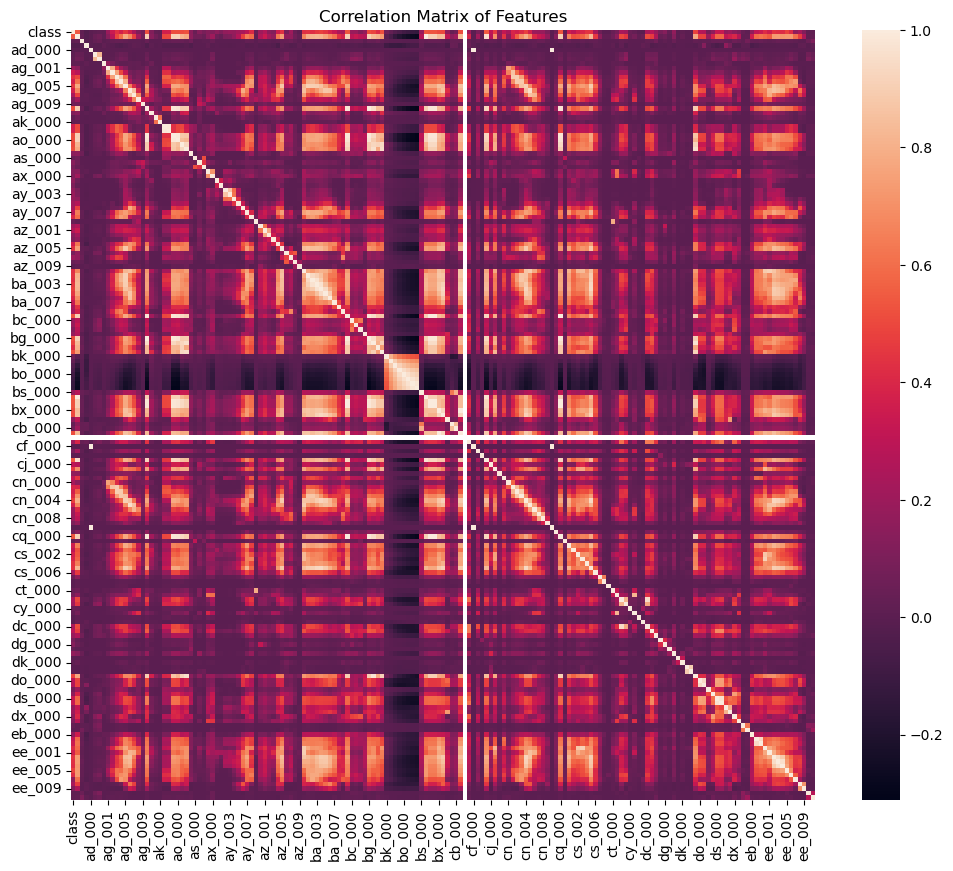

In [22]:
correlation_matrix = df_train.corr()

plt.figure(figsize=(12, 10))

sns.heatmap(correlation_matrix)

plt.title('Correlation Matrix of Features')
plt.show()

#### (iv) Make scatter plots and box plots

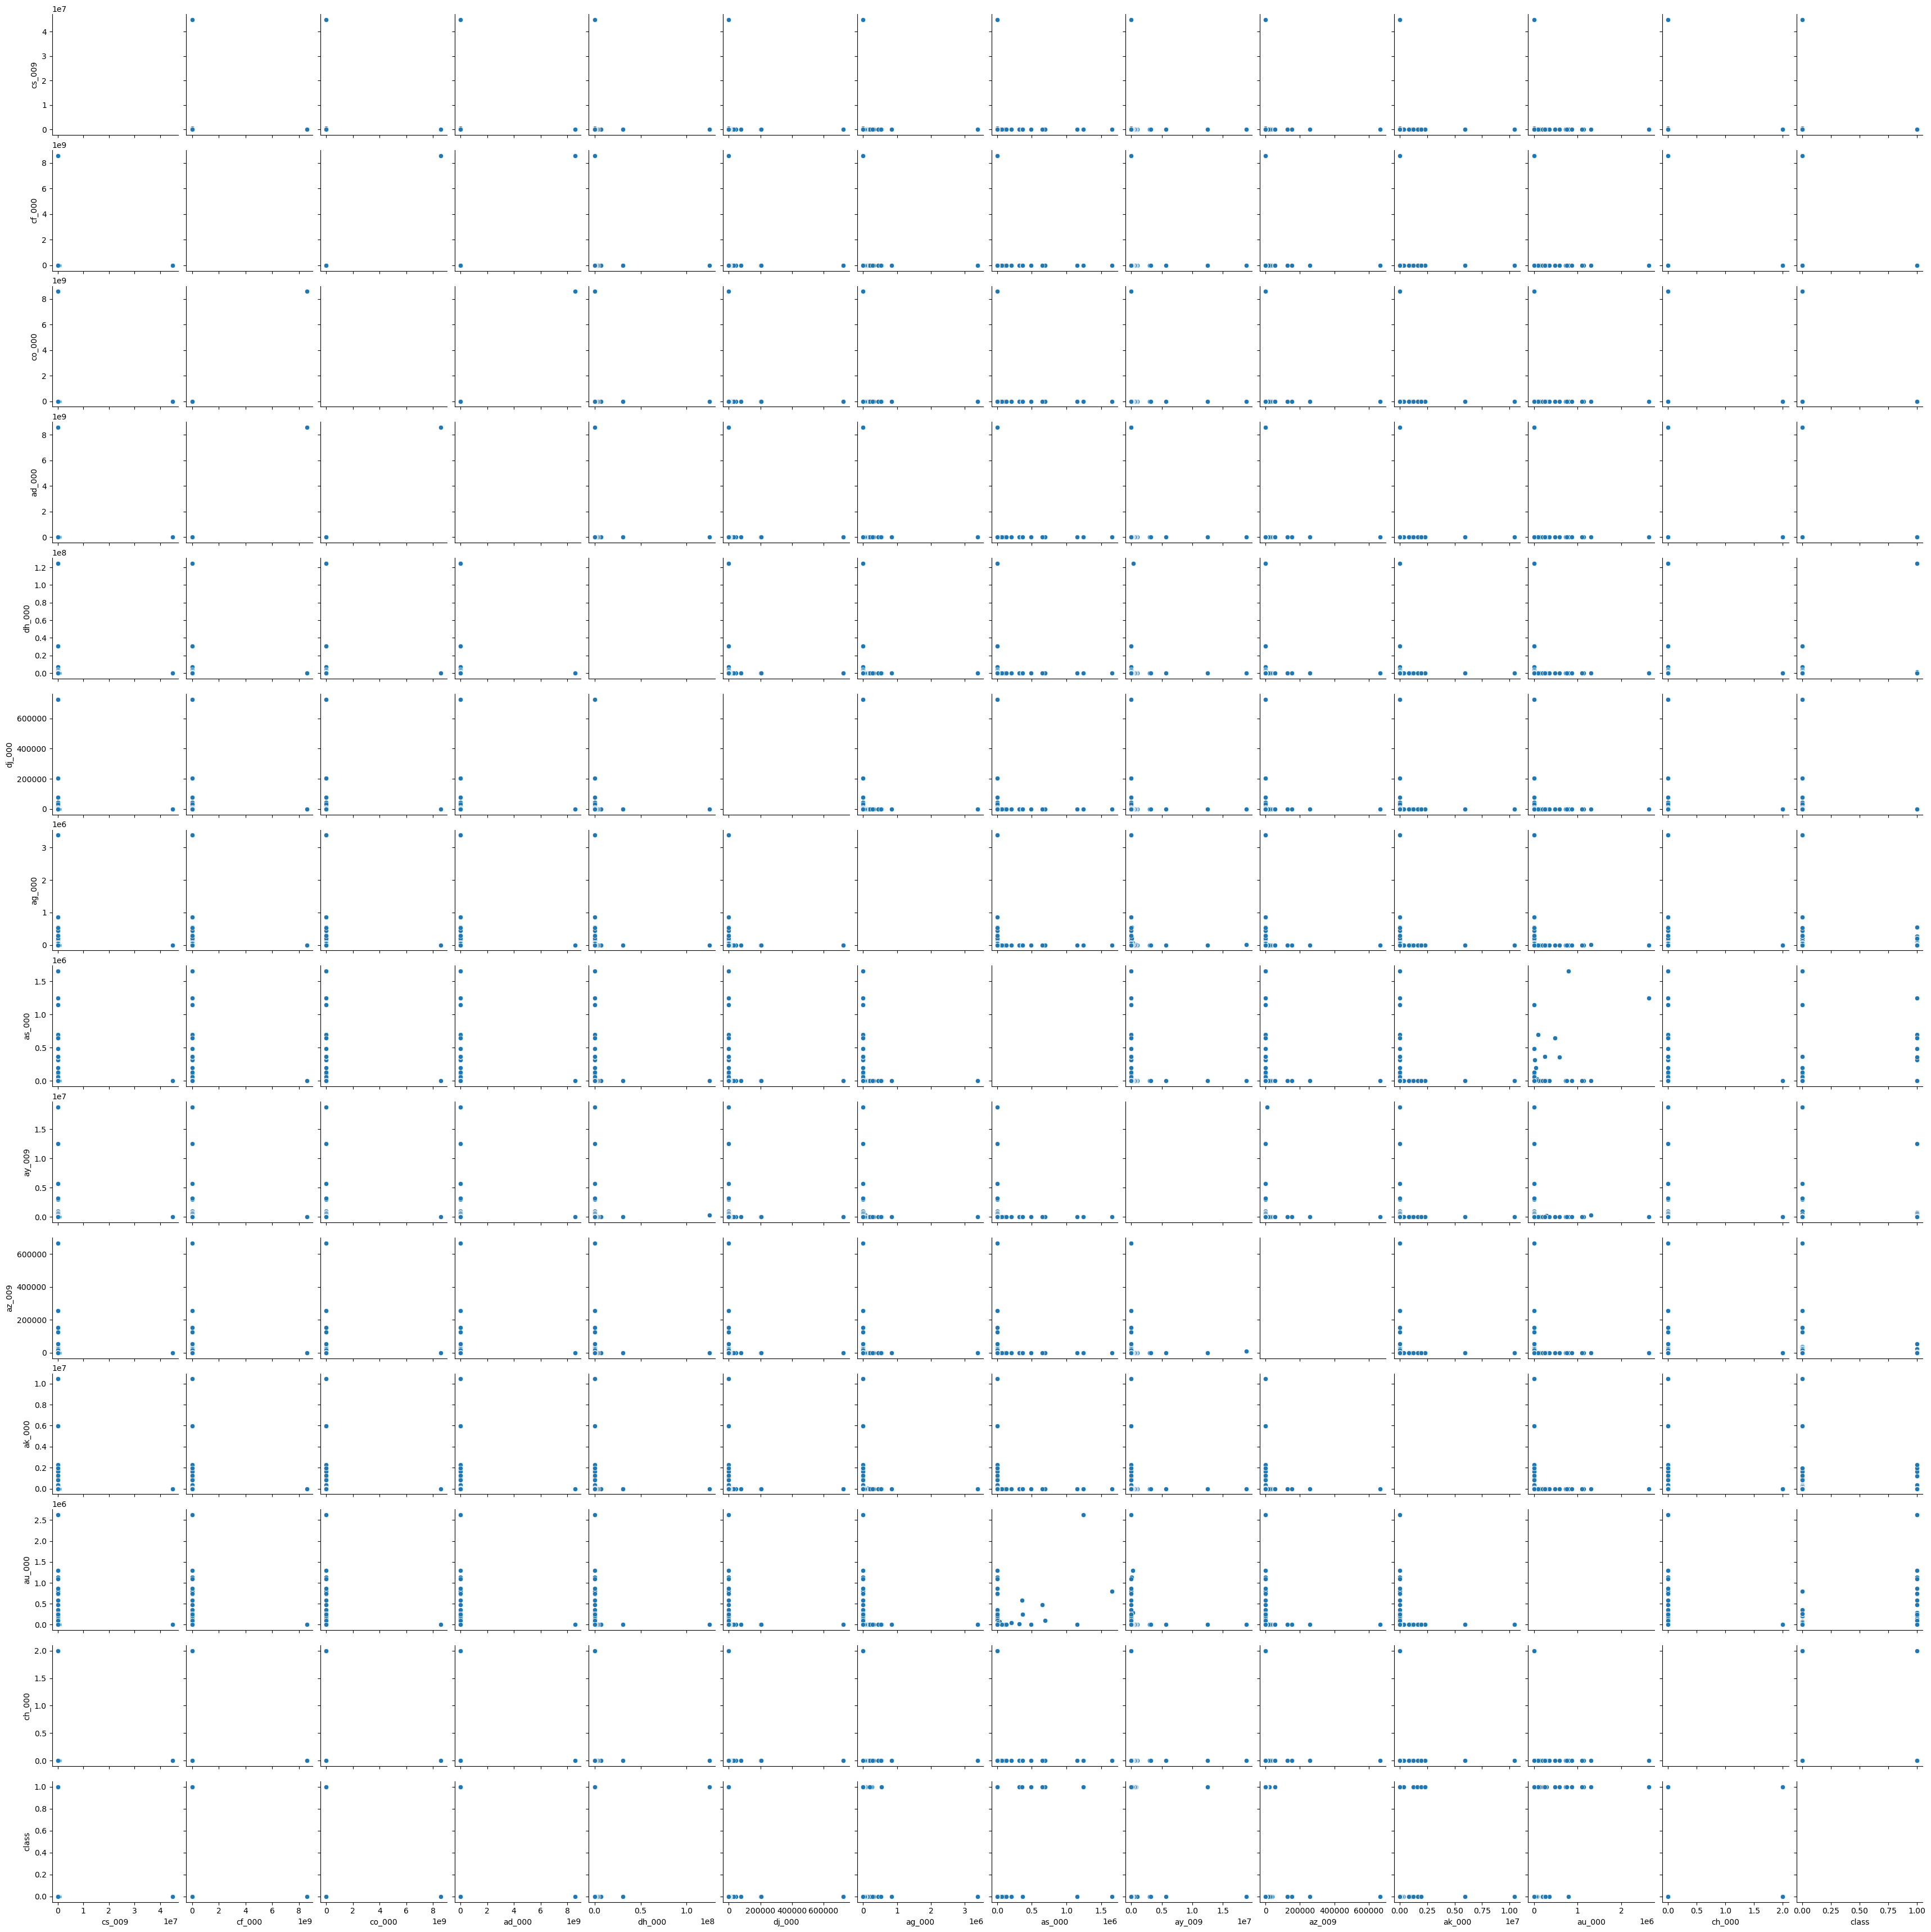

In [23]:
num_features_to_select = int(np.floor(np.sqrt(len(cv_values))))
top_features = sorted(cv_values, key=cv_values.get, reverse=True)[:num_features_to_select]

selected_data = df_train[top_features]

selected_data['class'] = df_train['class']

sns.pairplot(selected_data, kind='scatter', diag_kind='box')
plt.show()

The scatterplots do not appear to reveal any discernible patterns or relationships between the variables.

#### (v) Is this data set imbalanced?

In [25]:
y_train = df_train['class']
print("Training set: " ,y_train.value_counts())
y_test = df_test['class']
print("Test set:" ,y_test.value_counts())

Training set:  class
0    59000
1     1000
Name: count, dtype: int64
Test set: class
0    15625
1      375
Name: count, dtype: int64


The dataset is imbalanced in both the training and test set.

### (c) Train a random forest

Accuracy Score (Training Set): 0.9925166666666667

Confusion Matrix (Training Set):
 [[58977    23]
 [  426   574]]


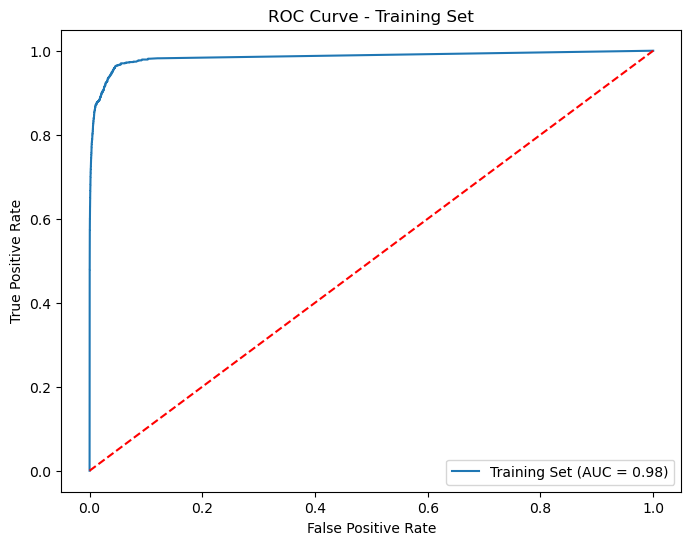


Misclassification Rate (Training Set):
 0.007483333333333286

Accuracy Score (Test Set): 0.9884375

Confusion Matrix (Test Set):
 [[15615    10]
 [  175   200]]


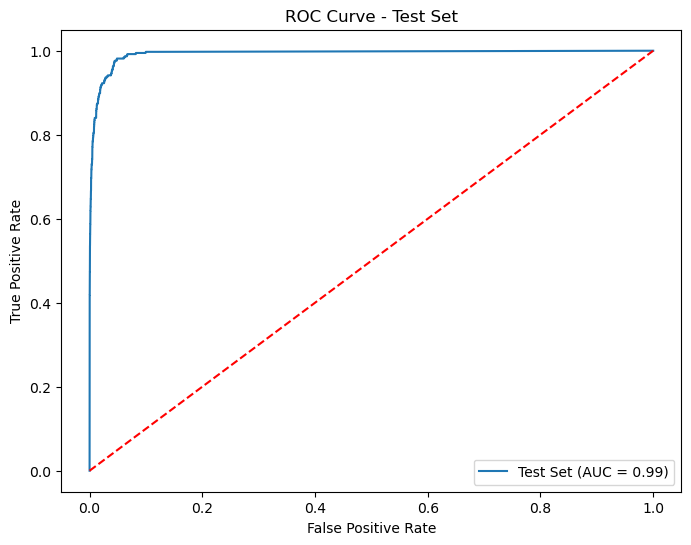

Misclassification Rate (Test Set):
 0.011562500000000031

Out-of-Bag (OOB) Error Estimate: 0.009066666666666667


In [27]:

X_train = df_train.drop(columns=['class'])  
X_test = df_test.drop(columns=['class'])  

y_train = df_train['class'] 
y_test = df_test['class']

rf_classifier = RandomForestClassifier(max_depth=5, oob_score = True, warm_start=True)
rf_classifier.fit(X_train, y_train)

y_train_proba = rf_classifier.predict_proba(X_train)[:, 1]
y_test_proba = rf_classifier.predict_proba(X_test)[:, 1]

y_train_pred = rf_classifier.predict(X_train)
y_test_pred = rf_classifier.predict(X_test)


# Accuracy scores
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)


# Confusion matrix
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)


#ROC curve and AUC for training
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
auc_train = roc_auc_score(y_train, y_train_proba)


# ROC curve and AUC for test set
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)
auc_test = roc_auc_score(y_test, y_test_proba)


# Misclassification rate
misclassification_train = 1 - accuracy_train
misclassification_test = 1 - accuracy_test


#Training
print("Accuracy Score (Training Set):", accuracy_train)
print("\nConfusion Matrix (Training Set):\n", conf_matrix_train)

plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'Training Set (AUC = {auc_train:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Training Set')
plt.legend()
plt.show()

print("\nMisclassification Rate (Training Set):\n", misclassification_train)

#Test Set
print("\nAccuracy Score (Test Set):", accuracy_test)
print("\nConfusion Matrix (Test Set):\n", conf_matrix_test)

plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, label=f'Test Set (AUC = {auc_test:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Test Set')
plt.legend()
plt.show()

print("Misclassification Rate (Test Set):\n", misclassification_test)


oob_error = 1 - rf_classifier.oob_score_
print("\nOut-of-Bag (OOB) Error Estimate:", oob_error)

### (d) Research class imbalance in random forest

Some techniques to address class imbalance in Random Forests are:
- Class weights: This allows the algorithm to pay more attention to the minority class during training by assigning it a weight.
- Sampling techniques: You can use techniques such as Synthetic Minority Oversampling Technique (SMOTE) or undersampling to balance the class distribution before training the Random Forest.
- Ensemble methods: Ensemble methods are specifically designed to handle class imbalance such as BalancedRandomForestClassifier or EasyEnsembleClassifier in python.

Accuracy Score (Training Set with Class Weights): 0.9596

Confusion Matrix (Training Set with Class Weights):
 [[56607  2393]
 [   31   969]]


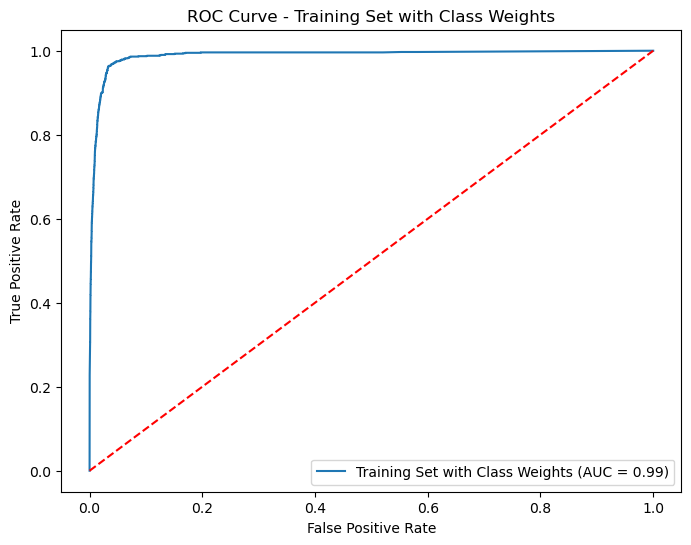


Misclassification Rate (Training Set with Class Weights):
 0.04039999999999999
Accuracy Score (Test Set with Class Weights): 0.959875

Confusion Matrix (Test Set with Class Weights):
 [[14996   629]
 [   13   362]]


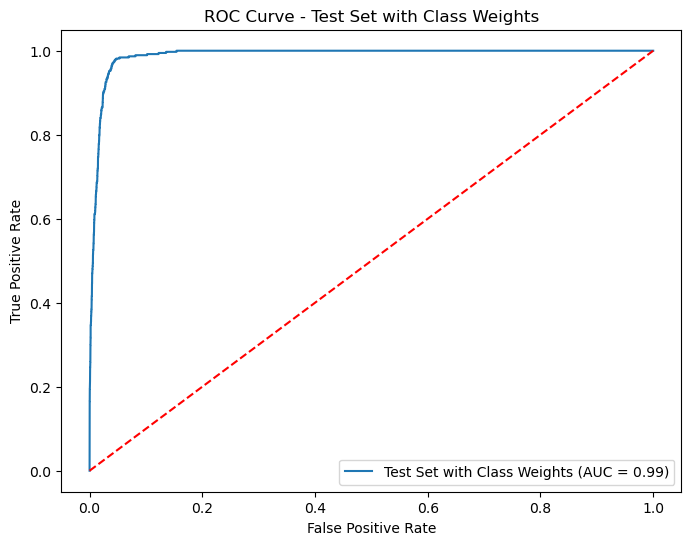

Misclassification Rate (Test Set with Class Weights):
 0.040124999999999966
Out-of-Bag (OOB) Error Estimate: 0.04166666666666663


In [29]:
rf_classifier_balanced = RandomForestClassifier(max_depth=5, class_weight='balanced', oob_score = True, warm_start=True)
rf_classifier_balanced.fit(X_train, y_train)


y_train_proba_balanced = rf_classifier_balanced.predict_proba(X_train)[:, 1]
y_test_proba_balanced = rf_classifier_balanced.predict_proba(X_test)[:, 1]

y_train_pred_balanced = rf_classifier_balanced.predict(X_train)
y_test_pred_balanced = rf_classifier_balanced.predict(X_test)

# Accuracy scores
accuracy_train_balanced = accuracy_score(y_train, y_train_pred_balanced)
accuracy_test_balanced = accuracy_score(y_test, y_test_pred_balanced)


# Confusion matrix
conf_matrix_train_balanced = confusion_matrix(y_train, y_train_pred_balanced)
conf_matrix_test_balanced = confusion_matrix(y_test, y_test_pred_balanced)


# ROC curve and AUC for training set
fpr_train_balanced, tpr_train_balanced, _ = roc_curve(y_train, y_train_proba_balanced)
auc_train_balanced = roc_auc_score(y_train, y_train_proba_balanced)


# ROC curve and AUC for test set
fpr_test_balanced, tpr_test_balanced, _ = roc_curve(y_test, y_test_proba_balanced)
auc_test_balanced = roc_auc_score(y_test, y_test_proba_balanced)


# Misclassification rate
misclassification_train_balanced = 1 - rf_classifier_balanced.score(X_train, y_train)
misclassification_test_balanced = 1 - rf_classifier_balanced.score(X_test, y_test)


#Training
print("Accuracy Score (Training Set with Class Weights):", accuracy_train_balanced)
print("\nConfusion Matrix (Training Set with Class Weights):\n", conf_matrix_train_balanced)

plt.figure(figsize=(8, 6))
plt.plot(fpr_train_balanced, tpr_train_balanced, label=f'Training Set with Class Weights (AUC = {auc_train_balanced:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Training Set with Class Weights')
plt.legend()
plt.show()

print("\nMisclassification Rate (Training Set with Class Weights):\n", misclassification_train_balanced)

#Test Set
print("Accuracy Score (Test Set with Class Weights):", accuracy_test_balanced)
print("\nConfusion Matrix (Test Set with Class Weights):\n", conf_matrix_test_balanced)

plt.figure(figsize=(8, 6))
plt.plot(fpr_test_balanced, tpr_test_balanced, label=f'Test Set with Class Weights (AUC = {auc_test_balanced:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Test Set with Class Weights')
plt.legend()
plt.show()

print("Misclassification Rate (Test Set with Class Weights):\n", misclassification_test_balanced)


oob_error = 1 - rf_classifier_balanced.oob_score_
print("Out-of-Bag (OOB) Error Estimate:", oob_error)

The overall accuracy for the test set with the class weights dropped from 0.98 to 0.96. However, the class weights helped to balance the minority class. When training without addressing the class imbalance we get 190/375, but after using class weights we get 357/375.

### (e) XGBoost and Model Trees

Confusion Matrix (Training Set):
 [[58986    14]
 [  113   887]]

Confusion Matrix (Test Set):
 [[15503   122]
 [  117   258]]

AUC (Training Set):
 0.998263686440678


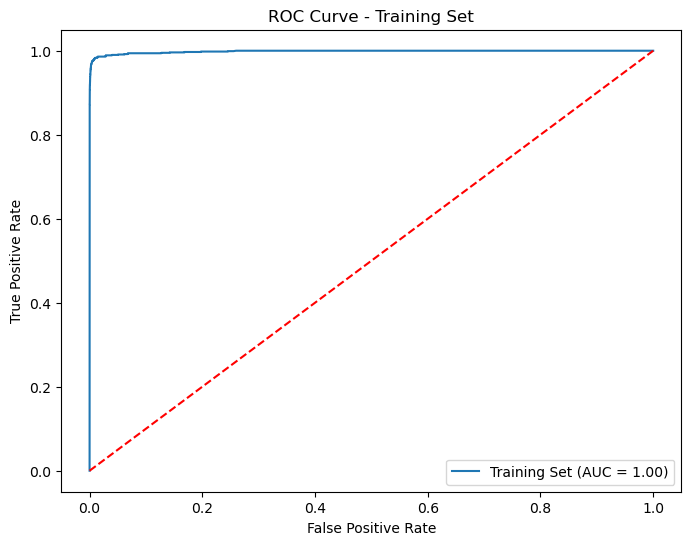


AUC (Test Set):
 0.9907826346666667


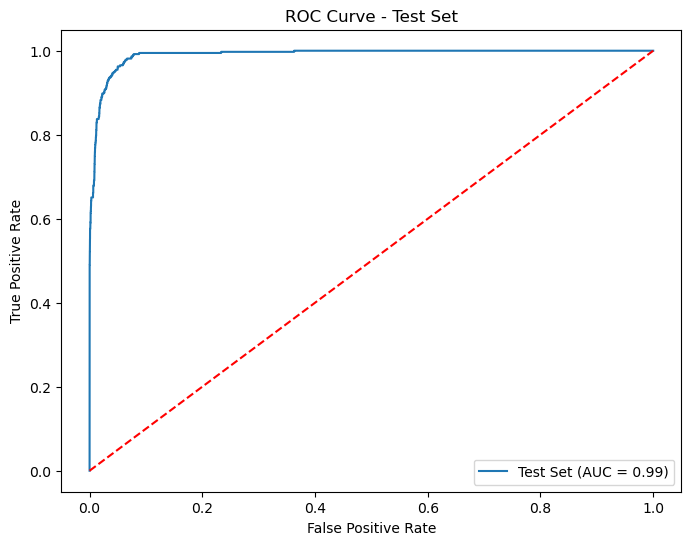

In [30]:
model = xgb.XGBClassifier(objective='binary:logistic')


params = {
    'reg_alpha': [0.01, 0.1, 1, 10, 100]  
}


cv_results = []
for alpha in params['reg_alpha']:
    model.set_params(reg_alpha=alpha)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')  
    cv_results.append((alpha, scores.mean()))

    
best_alpha, _ = max(cv_results, key=lambda x: x[1])


model.set_params(reg_alpha=best_alpha)
model.fit(X_train, y_train)


y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


# Confusion matrix
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

print("Confusion Matrix (Training Set):\n", conf_matrix_train)
print("\nConfusion Matrix (Test Set):\n", conf_matrix_test)


# ROC curve and AUC for training set
y_train_proba = model.predict_proba(X_train)[:, 1]
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
auc_train = roc_auc_score(y_train, y_train_proba)
print("\nAUC (Training Set):\n", auc_train)


# Plot ROC curve for training set
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'Training Set (AUC = {auc_train:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Training Set')
plt.legend()
plt.show()


# ROC curve and AUC for test set
y_test_proba = model.predict_proba(X_test)[:, 1]
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)
auc_test = roc_auc_score(y_test, y_test_proba)
print("\nAUC (Test Set):\n", auc_test)


# Plot ROC curve for test set
plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, label=f'Test Set (AUC = {auc_test:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Test Set')
plt.legend()
plt.show()

### (f) Use SMOTE to pre-process your data

Confusion Matrix (Training Set - SMOTE):
 [[59000     0]
 [    1 58999]]

Confusion Matrix (Test Set):
 [[15421   204]
 [   67   308]]
AUC (Training Set - SMOTE): 0.9999999770180983


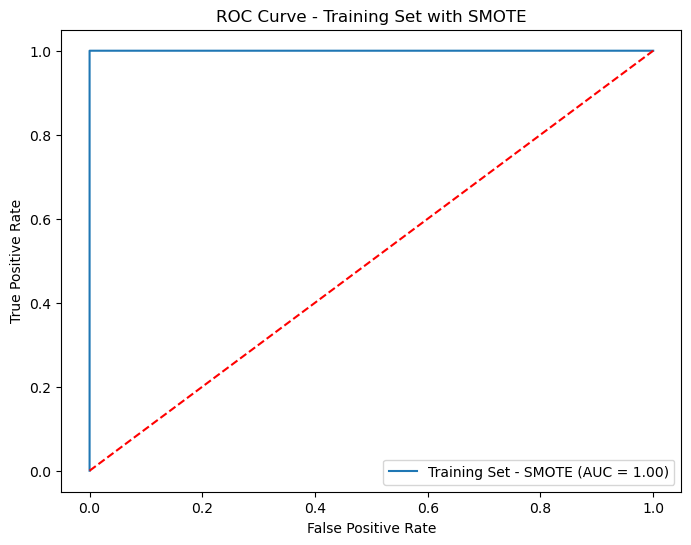

AUC (Test Set): 0.988147712


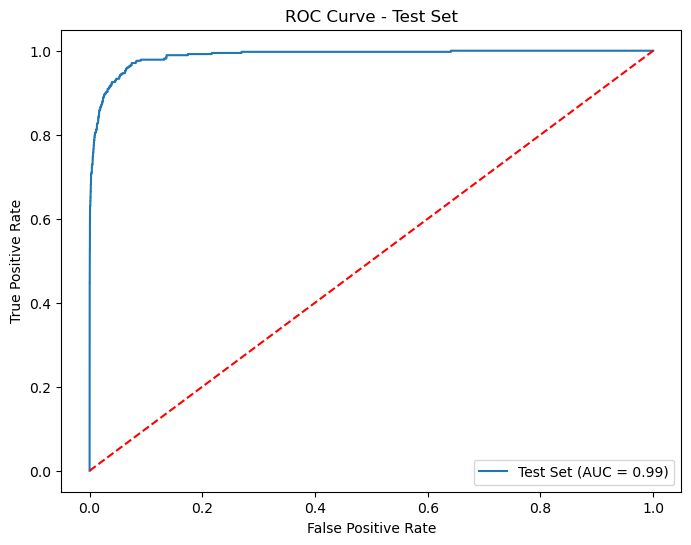

In [31]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

model = xgb.XGBClassifier(objective='binary:logistic')

params = {
    'reg_alpha': [0.01, 0.1, 1, 10, 100]  
}

cv_results = []
for alpha in params['reg_alpha']:
    model.set_params(reg_alpha=alpha)
    scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=5, scoring='roc_auc')
    cv_results.append((alpha, scores.mean()))



best_alpha, _ = max(cv_results, key=lambda x: x[1])



model.set_params(reg_alpha=best_alpha)
model.fit(X_train_resampled, y_train_resampled)

y_train_pred = model.predict(X_train_resampled)
y_test_pred = model.predict(X_test)


# Confusion matrix
conf_matrix_train = confusion_matrix(y_train_resampled, y_train_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

print("Confusion Matrix (Training Set - SMOTE):\n", conf_matrix_train)
print("\nConfusion Matrix (Test Set):\n", conf_matrix_test)


# ROC curve and AUC for training set
y_train_proba = model.predict_proba(X_train_resampled)[:, 1]
fpr_train, tpr_train, _ = roc_curve(y_train_resampled, y_train_proba)
auc_train = roc_auc_score(y_train_resampled, y_train_proba)
print("AUC (Training Set - SMOTE):", auc_train)

# ROC curve for training set
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'Training Set - SMOTE (AUC = {auc_train:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Training Set with SMOTE')
plt.legend()
plt.show()

# ROC curve and AUC for test set
y_test_proba = model.predict_proba(X_test)[:, 1]
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)
auc_test = roc_auc_score(y_test, y_test_proba)
print("AUC (Test Set):", auc_test)

# ROC curve for test set
plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, label=f'Test Set (AUC = {auc_test:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Test Set')
plt.legend()
plt.show()

After completing accuracy, precision, recall, and f1-score, the uncompensated case has a higher precision but lower recall compared to the SMOTE case. Both have high accuracy, but choosing between the two will depend on specific requirements.

## 2. ISLR 6.6.3

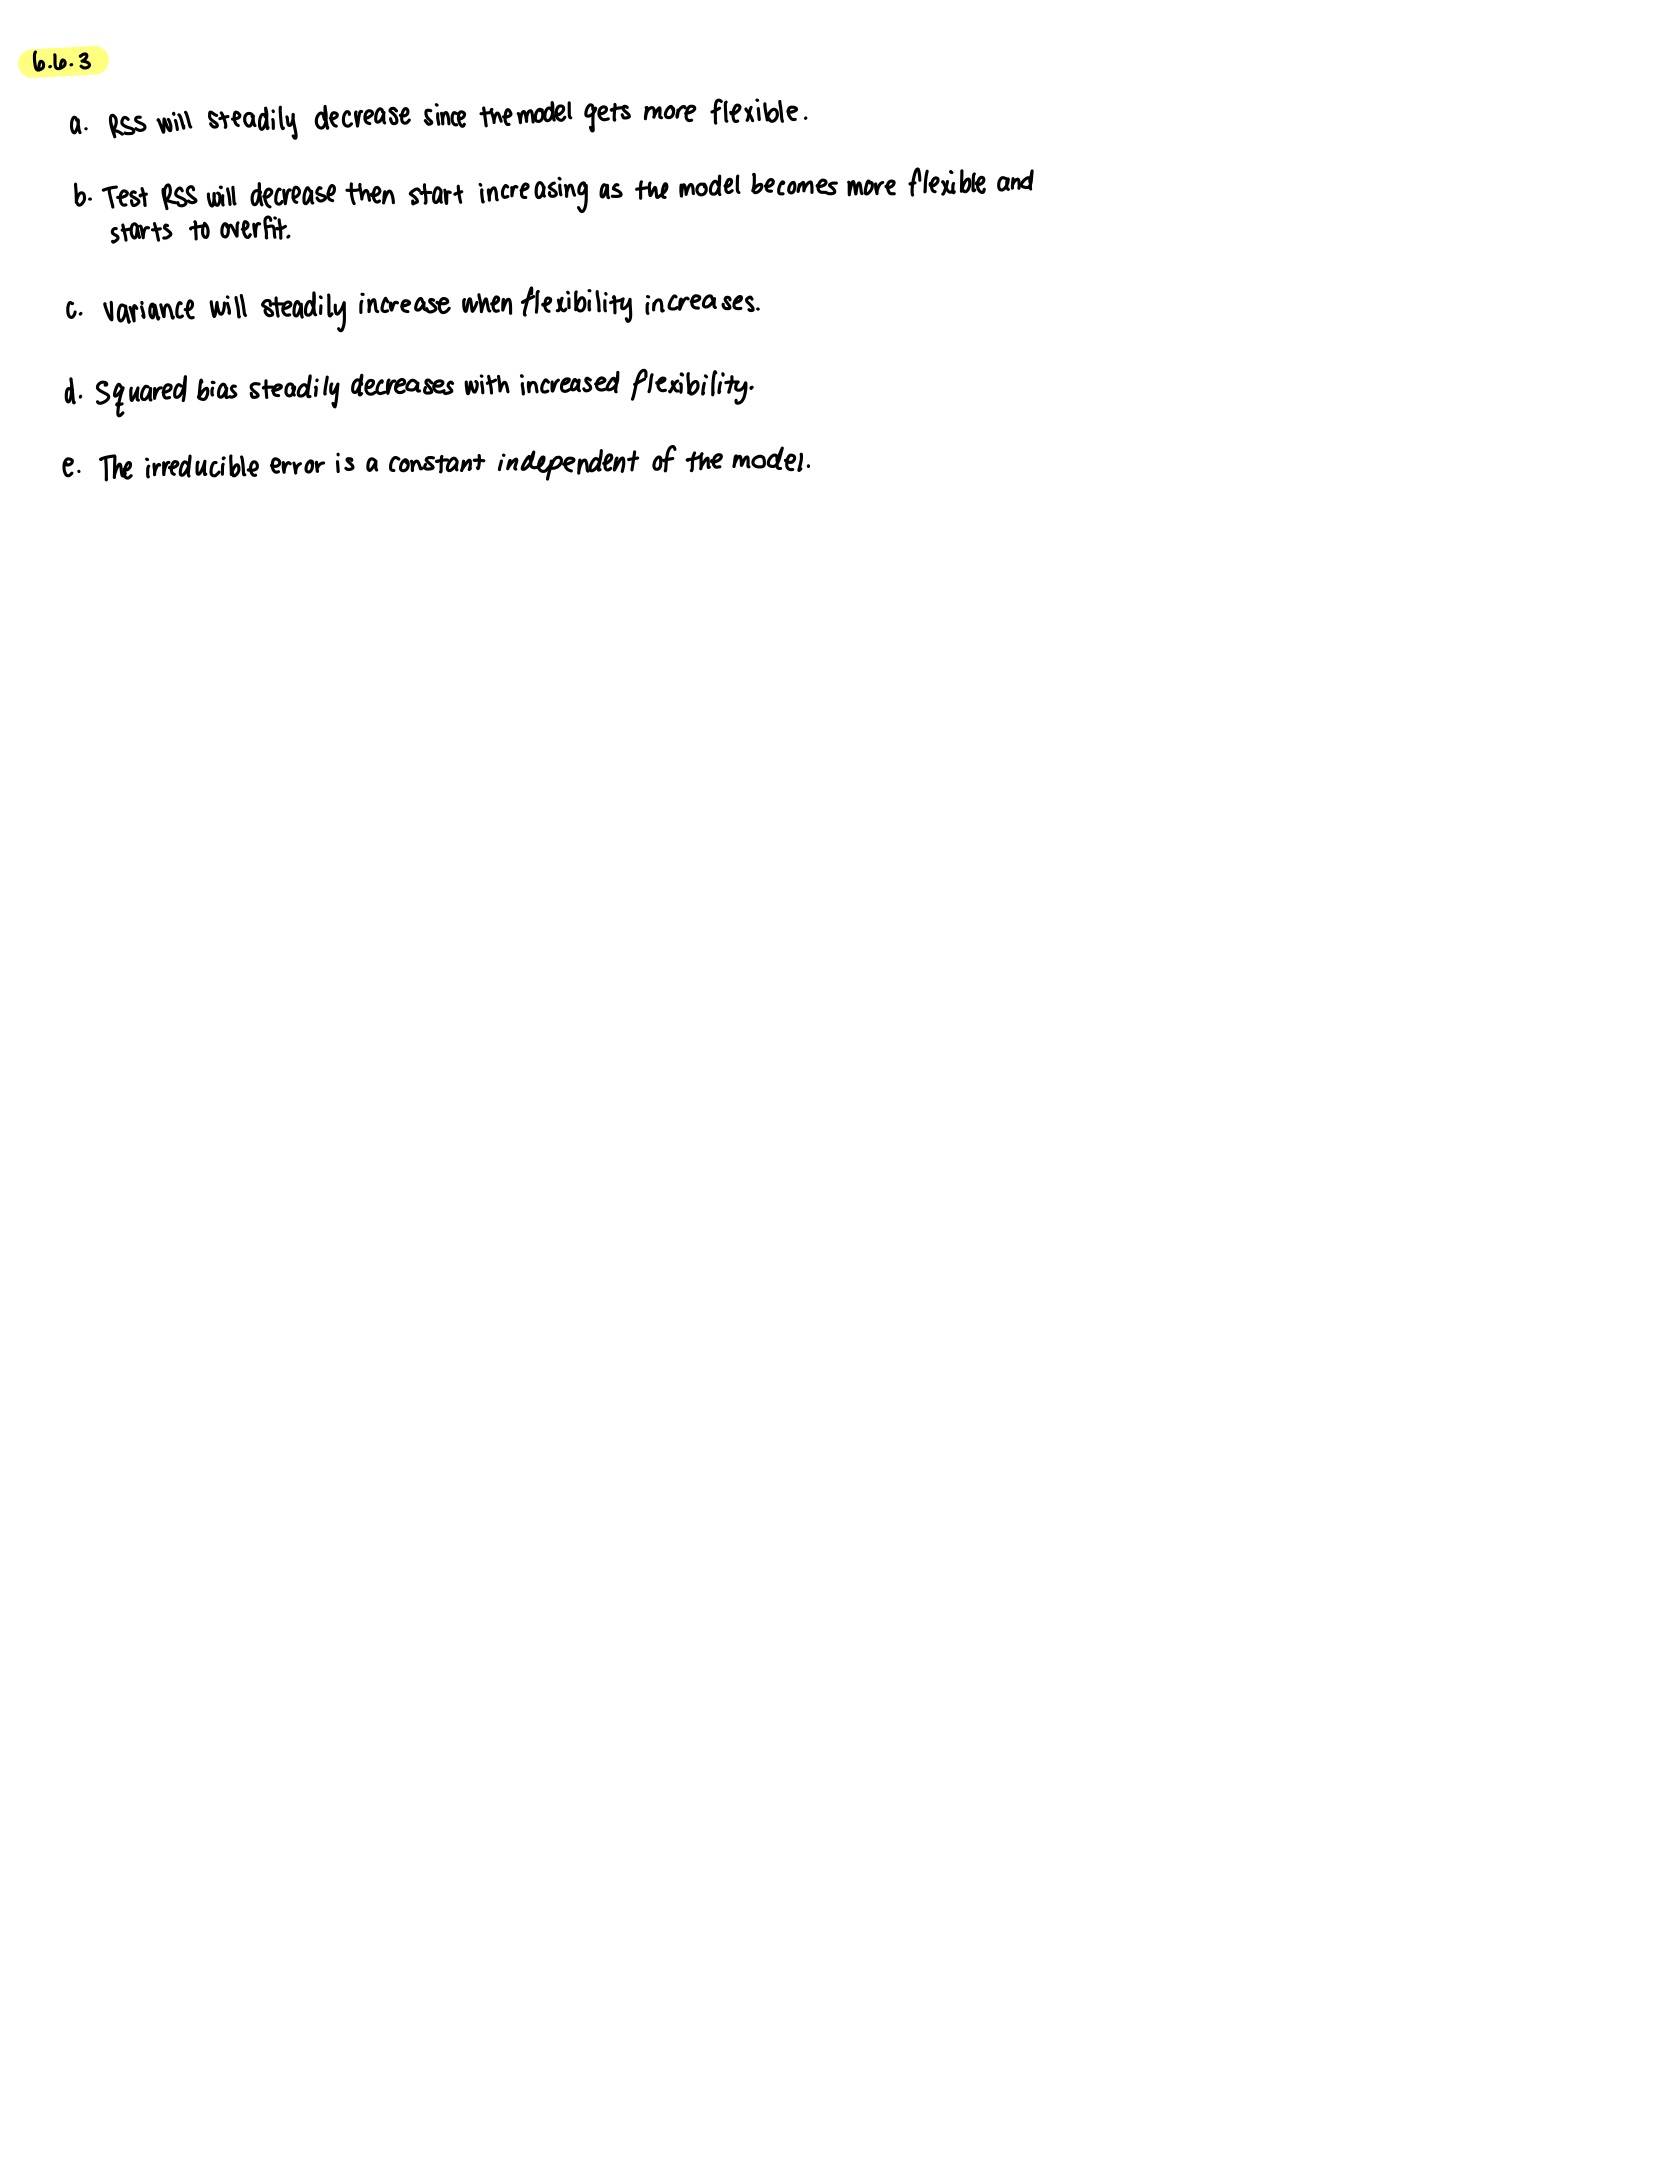

## 3. ISLR 6.6.5

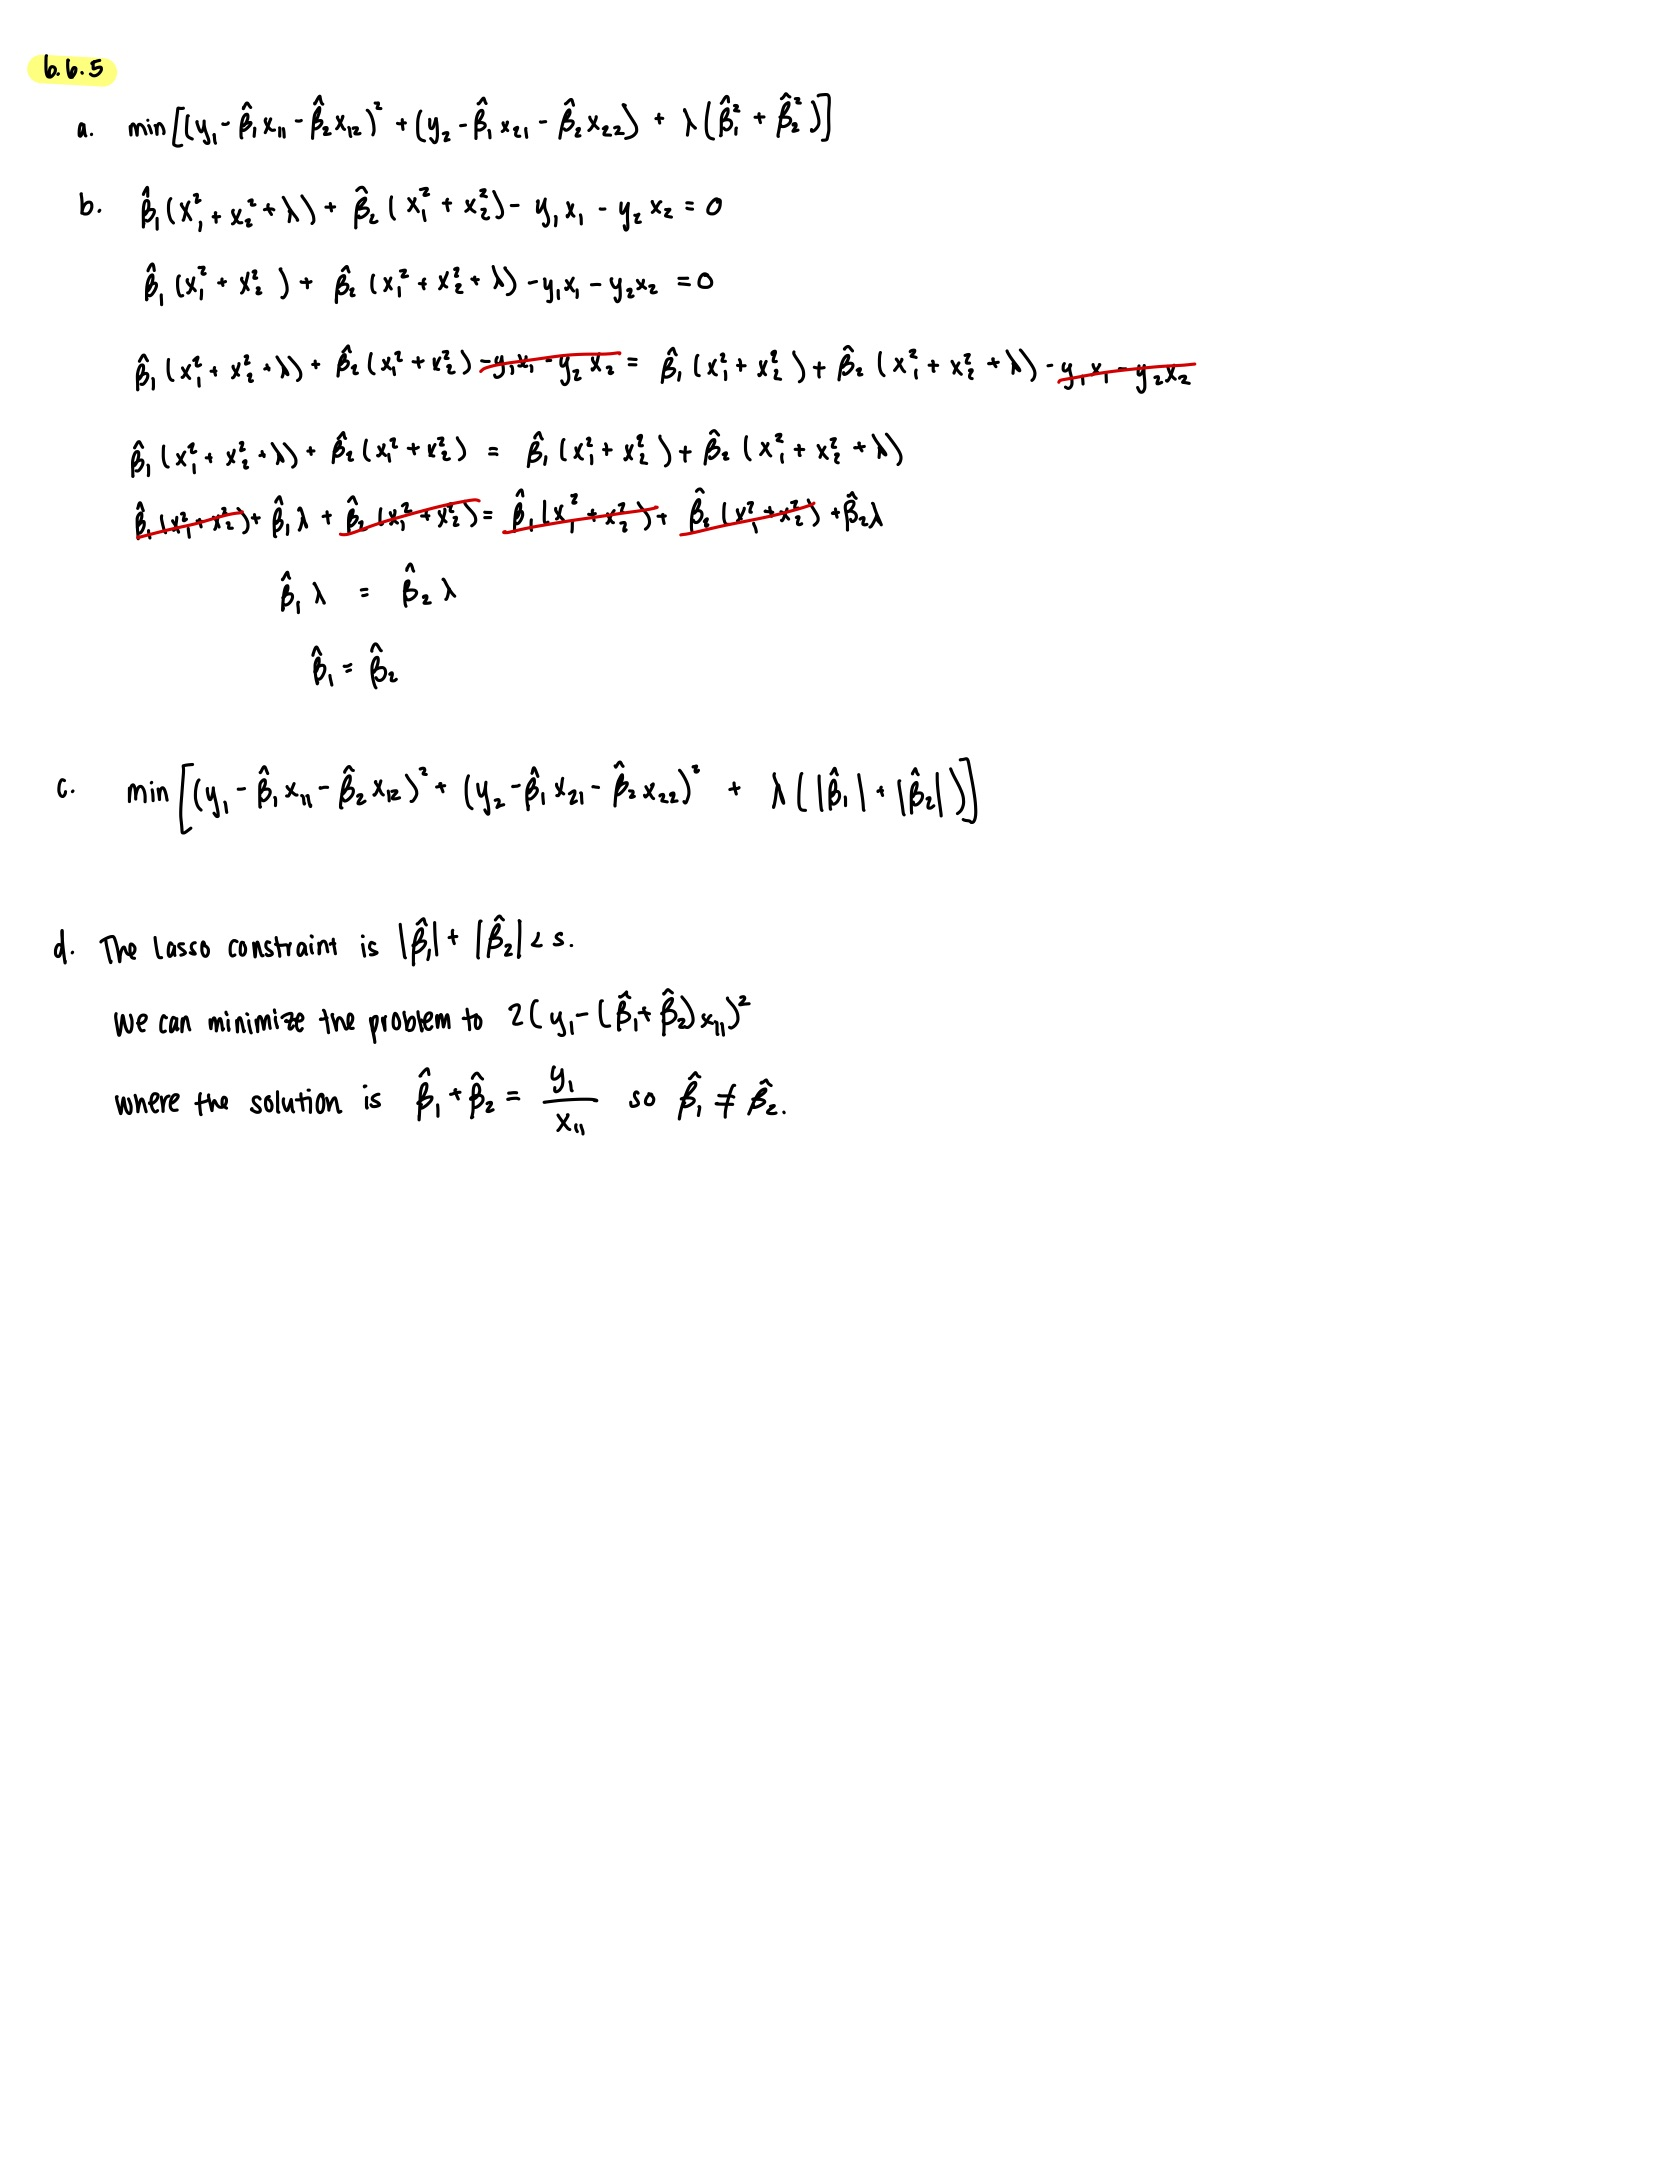

## 4. ISLR 8.4.5

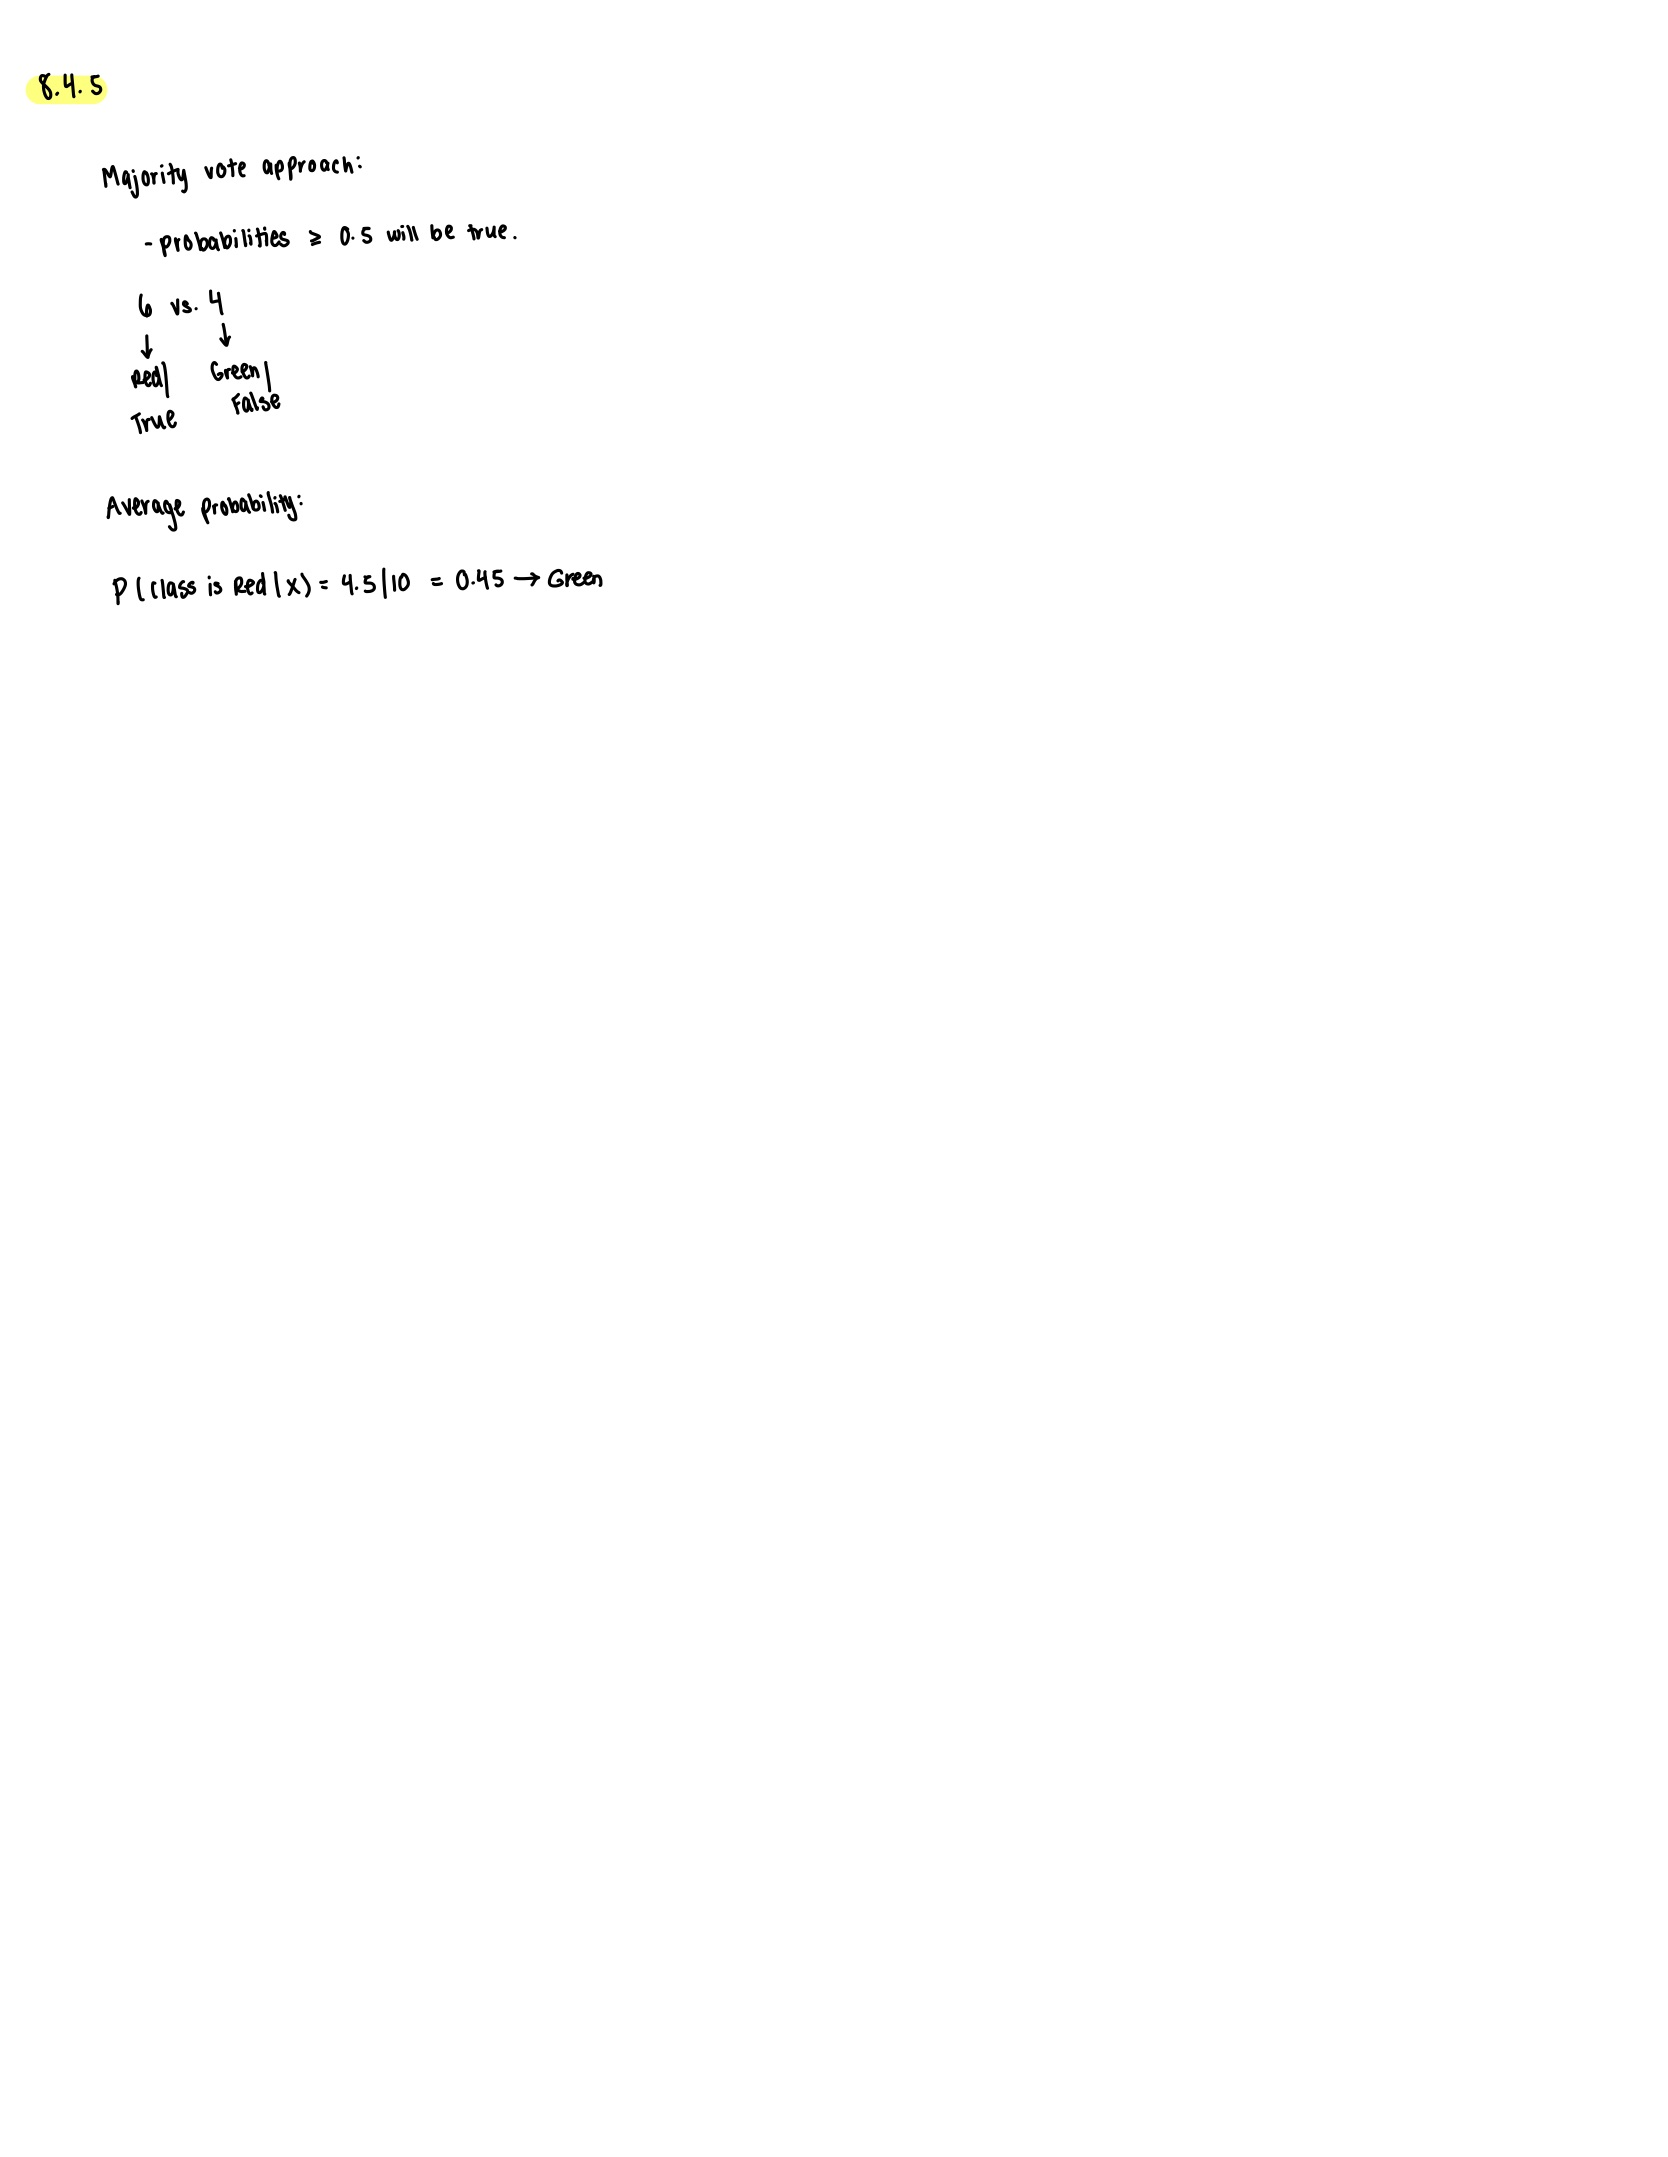

## 5. ISLR 9.7.3

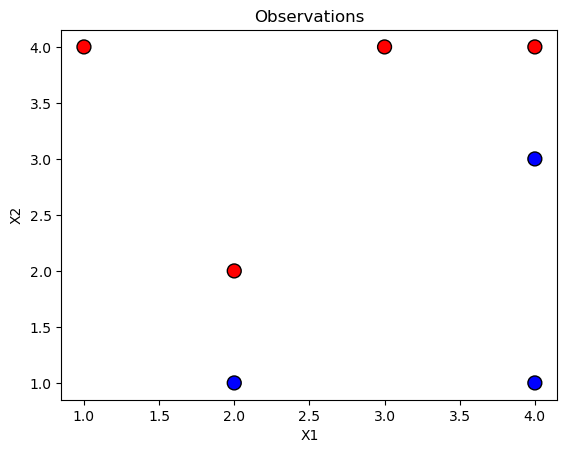

In [33]:
#a
X = np.array([[3, 4],
              [2, 2],
              [4, 4],
              [1, 4],
              [2, 1],
              [4, 3],
              [4, 1]])
y = np.array(['Red', 'Red', 'Red', 'Red', 'Blue', 'Blue', 'Blue'])

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k', s=100)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Observations')
plt.show()

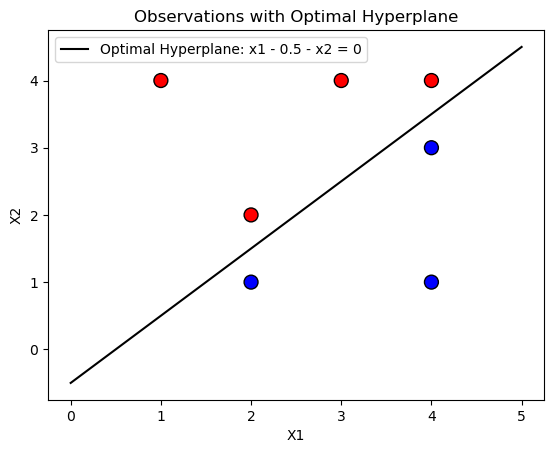

In [34]:
#b

x1 = np.linspace(0, 5, 100)
x2 = x1 - 0.5
plt.plot(x1, x2, 'k-', label='Optimal Hyperplane: x1 - 0.5 - x2 = 0')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k', s=100)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Observations with Optimal Hyperplane')
plt.legend()
plt.show()

Equation: x2 - x1 + 0.5

## C)
f(X) = x2 - x1 + 0.5
- Classify to Red if f(X) > 0 
- Classify to Blue if f(X) <= 0 ---> Blue

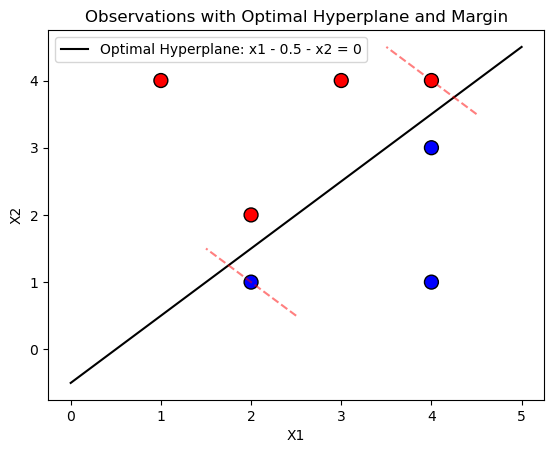

In [35]:
#d

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k', s=100)

x1 = np.linspace(0, 5, 100)
x2 = x1 - 0.5
plt.plot(x1, x2, 'k-', label='Optimal Hyperplane: x1 - 0.5 - x2 = 0')


support_vectors = np.array([[2, 1], [4, 4]])
margin_width = 1 / np.sqrt(2)  
unit_normal_vector = np.array([1, -1]) / np.sqrt(2)  
for vector in support_vectors:
    point1 = vector + margin_width * unit_normal_vector
    point2 = vector - margin_width * unit_normal_vector
    plt.plot([point1[0], point2[0]], [point1[1], point2[1]], 'r--', alpha=0.5)

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Observations with Optimal Hyperplane and Margin')
plt.legend()
plt.show()

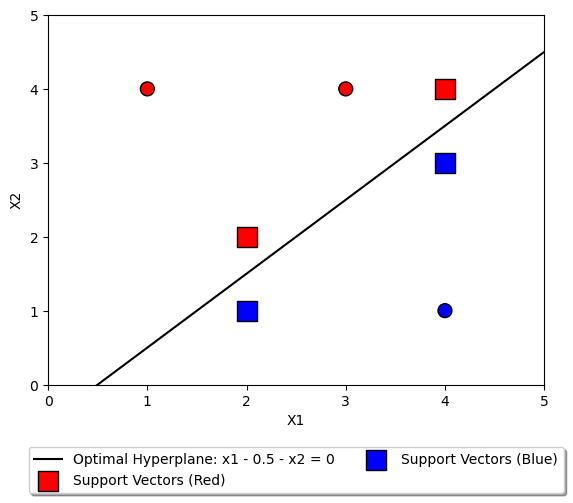

In [37]:
#e

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k', s=100)

slope = 1
intercept = -0.5
x_values = np.array([0, 5])
plt.plot(x_values, slope * x_values + intercept, 'k-', label='Optimal Hyperplane: x1 - 0.5 - x2 = 0')

support_vectors_red = np.array([[2, 2], [4, 4]])
support_vectors_blue = np.array([[2, 1], [4, 3]])
plt.scatter(support_vectors_red[:, 0], support_vectors_red[:, 1], color='red', edgecolors='k', s=200, marker='s', label='Support Vectors (Red)')
plt.scatter(support_vectors_blue[:, 0], support_vectors_blue[:, 1], color='blue', edgecolors='k', s=200, marker='s', label='Support Vectors (Blue)')

plt.xlim(0, 5)
plt.ylim(0, 5)

plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=2)
plt.show()

## F)
A slight movement of the seventh observation would not affect the maximal margin hyperplane since it does not lie on the margin or affect the margin's width.

## G)
Equation: 0.9x1 - x2 - 0.3 = 0

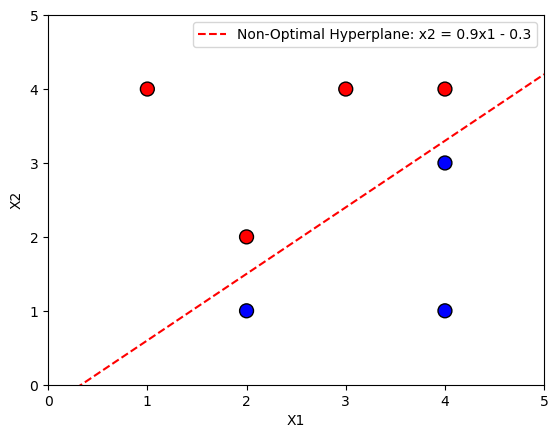

In [39]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k', s=100)

x_values = np.array([0, 5])
slope_non_optimal = 0.9
intercept_non_optimal = -0.3

plt.plot(x_values, slope_non_optimal * x_values + intercept_non_optimal, 'r--', label='Non-Optimal Hyperplane: x2 = 0.9x1 - 0.3')

plt.xlim(0, 5)
plt.ylim(0, 5)

plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()

plt.show()

## H)

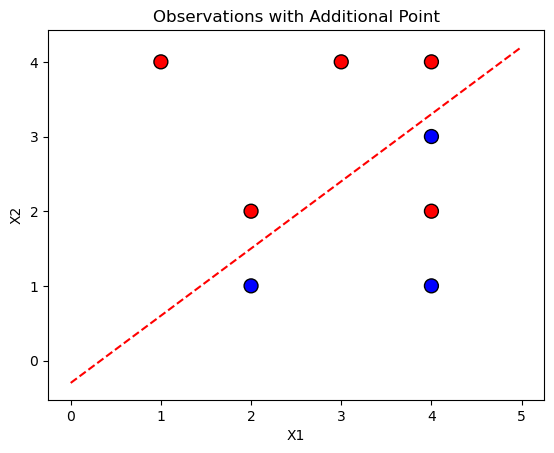

In [40]:
#h
X_new = np.append(X, [[4, 2]], axis=0)
y_new = np.append(y, ['Red'])
plt.plot(x_values, slope_non_optimal * x_values + intercept_non_optimal, 'r--', label='Non-Optimal Hyperplane: x2 = 0.9x1 - 0.3')

plt.scatter(X_new[:, 0], X_new[:, 1], c=y_new, cmap='coolwarm', edgecolors='k', s=100)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Observations with Additional Point')
plt.show()